In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
# Split the data into features (X) and labels (y)
X = mnist.data
y = mnist.target

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
import math 
def monotone_missing(data, perc_del, perc_width, perc_height, im_width, im_height):
    n = data.shape[0]; 
    m = im_width; 
    p = im_width * im_height

    # position (from width and height) of pixel would be deleted 
    from_width  = math.ceil((1-perc_width)*im_width)-1
    from_height = math.ceil((1-perc_height)*im_width)-1

    nan_rows = np.unique(np.sort(np.random.randint(0, n, int(n*perc_del))))
    nan_rows = nan_rows[:, np.newaxis]

    col_idxs = np.arange(p).reshape(-1, m)

    filter_height = np.arange(from_height, im_height) 
    filter_width  = np.arange(from_width, im_width)

    col_idxs = col_idxs[:, filter_width][filter_height,:].reshape(-1)
    #flatten row removed 
    missing_data = data.copy().astype('float')
    missing_data[nan_rows, col_idxs] = np.nan

    return (missing_data.reshape(n, p), nan_rows.ravel()) 

In [6]:
import pandas as pd

# Convert X and y to a DataFrame
df = pd.DataFrame(X)
# Show the first few rows of the DataFrame
print(df.head())


   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

In [7]:
df['label']=y

In [11]:
df.iloc[:,:-1]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data, nan_rows = monotone_missing(df.iloc[:,:-1].values, .5, .6, .6, 28, 28)
data = pd.DataFrame(data, columns=df.columns[:-1])

In [15]:
data['label'] = y

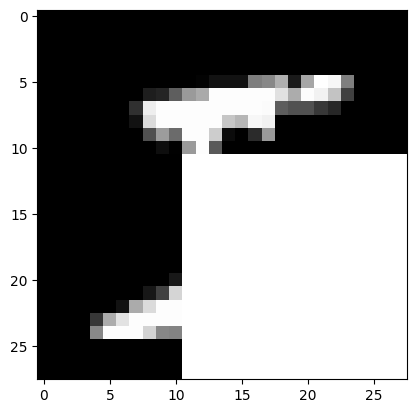

In [15]:
import matplotlib.pyplot as plt

pixels = data.iloc[0][:-1].values.astype(float)

# Plot the first image in the MNIST dataset
plt.imshow(pixels.reshape(28, 28), cmap='gray')
plt.show()

In [1]:
data.to_csv('mnist_missing.csv',index=False)

NameError: name 'data' is not defined

In [1]:
# from utils import *
import pandas as pd
import numpy as np

2023-04-17 06:08:34.750322: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 06:08:36.198111: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-17 06:08:36.198148: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-17 06:08:40.594316: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np
def apply_normalize(df):
    output = df.copy()
    # scaler = MinMaxScaler() #StandardNormalize -> 
    scaler = StandardScaler()
    for each in output.columns:
      output[each] = scaler.fit_transform(output[[each]])
    return output

In [2]:
# data = pd.read_csv('mnist_missing.csv')
# data = apply_normalize(data) # vcl 6p40s =))

In [6]:
data = pd.read_csv('mnist_missing_normalize.csv')

In [3]:
# data.to_csv('mnist_missing_normalize.csv',index=False)

In [7]:
memory_usage = data.memory_usage(deep=True).sum() / (1024**3)

print(f"Memory usage of df: {memory_usage:.2f} Gb")

Memory usage of df: 0.41 Gb


In [ ]:
# def impute_with_mice(df, n_iterations=10):
#     imputer = IterativeImputer(max_iter=n_iterations, random_state=123,sample_posterior=True,
#                                 tol=1e-9,imputation_order='descending')
#     imputed_array = imputer.fit_transform(df)
#     imputed_df = pd.DataFrame(imputed_array, columns=df.columns)

#     return imputed_df

In [4]:
# data_test = data.sample(n=100)

In [5]:
# imputed_mice = impute_with_mice(data_test,10)

In [4]:
data.shape , data.shape[0] / 100

((70000, 785), 700.0)

In [5]:
# X_train_subsets = np.array_split(data.to_numpy(), 70000)

In [6]:
# len(X_train_subsets)

70000

In [17]:
# X_train_subsets[0].dtype

dtype('float64')

In [16]:
# # import sklearn.externals as extjoblib
# import joblib
# from tqdm import tqdm 

# for i,X_train_subset in tqdm(enumerate(X_train_subsets[:2])):
#     if i == 0 :
#         imputer = IterativeImputer(max_iter=1, random_state=123)
#         imputer.fit(X_train_subset)
#         joblib.dump(imputer, f'ckpt/imputer_{i}.joblib')        
#         del imputer 
#     else : 
#         imputer = joblib.load(f'ckpt/imputer_{i-1}.joblib')
#         imputer.fit(X_train_subset)
#         joblib.dump(imputer, f'ckpt/imputer_{i}.joblib')        
#         del imputer 

2it [01:45, 52.56s/it]


In [ ]:
# import joblib
# from tqdm import tqdm 

# imputer = IterativeImputer(max_iter=10, random_state=123)

# for i, X_train_subset in tqdm(enumerate(X_train_subsets)):
#     imputer.partial_fit(X_train_subset)
#     joblib.dump(imputer, f'ckpt/imputer_{i}.joblib')
    
# imputer_full = IterativeImputer(max_iter=10, random_state=123)
# for i, X_train_subset in tqdm(enumerate(X_train_subsets)):
#     imputer_subset = joblib.load(f'ckpt/imputer_{i}.joblib')
#     imputer_full = imputer_full.partial_fit(X_train_subset, initial_strategy="most_frequent",
#                                              imputer=imputer_subset)
#     del imputer_subset

# X_train_imputed = imputer_full.transform(data)


In [4]:
data.iloc[0]

pixel1      0.00000
pixel2      0.00000
pixel3      0.00000
pixel4      0.00000
pixel5      0.00000
             ...   
pixel781        NaN
pixel782        NaN
pixel783        NaN
pixel784        NaN
label       0.18946
Name: 0, Length: 785, dtype: float64

# New Return

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression,BayesianRidge
from sklearn.model_selection import train_test_split
import numpy as np

class MiceImputer(object):
	def __init__(self, missing_values=np.nan, strategy="mean", verbose=0, copy=True):
		self.missing_values = missing_values
		self.strategy = strategy
		self.verbose = verbose
		self.copy = copy
		self.imp = SimpleImputer(missing_values=self.missing_values, 
                                strategy=self.strategy,
                                verbose=self.verbose, copy=self.copy)

	def _seed_values(self, X):
		np.random.seed(123)
		# self.imp.fit(X)
		return self.imp.fit_transform(X)
			
	def _process(self, X, column, model_class,X_tmp,**k):
		# Remove values that are in mask
		mask = np.array(self._get_mask(X, self.missing_values)[:, column].T)[0]
		mask_indices = np.where(mask==True)[0]
		# print("++++",mask)
		X_data = np.delete(X, mask_indices, 0)
		# Instantiate the model
		model = model_class(**k)

		# Slice out the column to predict and delete the column.
		y_data = X[:, column]
		X_data = np.delete(X, column, 1)
		X_temp = np.delete(X_tmp, column, 1)

		# print("y_data : ", y_data)
		# Split training and test data
		# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

		train_indices = np.where(~np.isnan(y_data))[0]
		test_indices = np.where(np.isnan(y_data))[0]
		
		# split X_data and y_data into train and test sets
		X_train_tmp = X_temp[train_indices] 	# full data 
		y_train_tmp = y_data[train_indices] # k NaN <- target
		X_predict = X_temp[test_indices]
		# print('=====<> ', X_predict)
		y_test = y_data[test_indices] # NaN ?
		# Fit the model
		# print(X_train_tmp.shape,y_train_tmp.shape, '----->', X_predict.shape )
		model.fit(X_train_tmp, y_train_tmp)

		# Score the model

		# Predict missing vars
		y_predict = model.predict(X_predict)

		# Replace values in X with their predictions	
		X[test_indices, column] = y_predict
		X_tmp[test_indices, column] = y_predict
		# Return model and scores
		return X,X_tmp
	
	def _get_mask(self,X, value_to_mask):
		if value_to_mask == "NaN" or np.isnan(value_to_mask):
			return np.isnan(X)
		else:
			return X == value_to_mask

	def transform(self, X, model_class=BayesianRidge, n_iter=10):
		index_of_nan = np.where(np.isnan(X).any(axis=0))[0]
		X = np.matrix(X)
		mask = self._get_mask(X, self.missing_values)
		seeded = self._seed_values(X)
		# specs = np.zeros((iterations, len(X.T)))
		# c = np.sum(np.isnan(X).any(axis=0))
		# print(index_of_nan)
		for i in index_of_nan:
			# specs[i][c] = self._process(X, c, model_class)
			# print(i)
			X,seeded = self._process(X, i, model_class,seeded)
		
		# Return X matrix with imputed values
		return X

In [6]:
# from sklearn.linear_model import LinearRegression
# # import skmice

# imputer = MiceImputer()
# X = [   [1, 2, 9], 
#         [4, np.nan, np.nan], 
#         [8, 5, 6], 
#         [7, 6, 15]]
# print('>>>',X)
# X_imputed = imputer.transform(X, BayesianRidge, 10)
# X_imputed

In [9]:
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.189460
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02502,-0.017317,-0.013028,-0.010189,-0.006857,0.0,0.0,0.0,0.0,-1.540540
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02502,-0.017317,-0.013028,-0.010189,-0.006857,0.0,0.0,0.0,0.0,-0.156540
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.194540
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02502,-0.017317,-0.013028,-0.010189,-0.006857,0.0,0.0,0.0,0.0,1.573459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02502,-0.017317,-0.013028,-0.010189,-0.006857,0.0,0.0,0.0,0.0,-0.848540
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02502,-0.017317,-0.013028,-0.010189,-0.006857,0.0,0.0,0.0,0.0,-0.502540
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.156540
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.189460


In [7]:
imputer = MiceImputer()
data_imputed = imputer.transform(data,BayesianRidge , 10)

/home/pn7hao/miniconda3/lib/python3.8/site-packages/sklearn/impute/_base.py:356: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(
/home/pn7hao/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/pn7hao/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/pn7hao/miniconda3/lib/python3.8/site-packages/sk

In [9]:
pd.DataFrame(data_imputed,columns=data.columns).to_csv('MICE_mnist.csv',index=False)

# finish

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits,load_iris
from utils import *
from collections import defaultdict

2023-04-18 00:07:27.713259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 00:07:27.913714: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-18 00:07:27.913748: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-18 00:07:28.790955: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
data = load_iris()
digits = load_digits()

In [3]:
perc = 0.3

# df = pd.DataFrame(data= np.c_[data['data'], data['target']],
#                      columns= data['feature_names'] + ['target'])
# new_df = randomly_missing(df,perc)
# n_sample = df.shape[0] * perc
# new_df = apply_normalize(new_df)
# corr_gt = df.corr()

df = pd.DataFrame(digits.data)
df['target'] = digits.target
new_df = randomly_missing_img(df,perc)
new_df['target'] = digits.target
new_df = apply_normalize(new_df)
corr_gt = df.corr()

In [23]:
# mice_imputed_cu = impute_with_mice(new_df,10)
# corr_mice_cu = mice_imputed_cu.corr()
# rmse_ignore_nan(corr_gt.to_numpy(),corr_mice_cu.to_numpy()) 

0.06121207147560513

In [24]:
# imputer = MiceImputer()
# mice_imputed_moi = pd.DataFrame(imputer.transform(new_df,BayesianRidge , 10),columns=new_df.columns)
# corr_mice_moi = mice_imputed_moi.corr()
# rmse_ignore_nan(corr_gt.to_numpy(),corr_mice_moi.to_numpy()) 

0.04320129244787328

In [4]:
def ginn_imputate(df, perc,Type,epochs=10):
    seed = 123

    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    
    cat_cols,num_cols = get_cat_num_cols(df)
    y = np.reshape(y,-1)
    num_classes = len(np.unique(y))

    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y
    )
    # gen randomly missing 
    # cx_train, cx_train_mask = degrade_dataset(x_train, missingness,seed, np.nan)
    # print('>>>>>>>>>')
    # print(cx_train)
    # print("<<<<<<<<< \n",cx_train_mask)
    # cx_test,  cx_test_mask  = degrade_dataset(x_test, missingness,seed, np.nan)

    missing_param = dict(perc_del=0.5, perc_width=perc, perc_height=perc, im_width=8, im_height=8)
    
    cx_train  = missing(data=x_train,Type=Type,**missing_param).to_numpy()
    cx_train_mask = np.where(np.isnan(cx_train), 0, 1)
    cx_test  = missing(data=x_test,Type=Type,**missing_param).to_numpy()
    cx_test_mask = np.where(np.isnan(cx_test), 0, 1)

    cx_tr = np.c_[cx_train, y_train]
    cx_te = np.c_[cx_test, y_test]

    mask_tr = np.c_[cx_train_mask, np.ones(y_train.shape)]
    mask_te = np.c_[cx_test_mask,  np.ones(y_test.shape)]

    [oh_x, oh_mask, oh_num_mask, oh_cat_mask, oh_cat_cols] = data2onehot(
        np.r_[cx_tr,cx_te], np.r_[mask_tr,mask_te], num_cols, cat_cols)

    oh_x_tr = oh_x[:x_train.shape[0],:]
    oh_x_te = oh_x[x_train.shape[0]:,:]

    oh_mask_tr = oh_mask[:x_train.shape[0],:]
    oh_num_mask_tr = oh_mask[:x_train.shape[0],:]
    oh_cat_mask_tr = oh_mask[:x_train.shape[0],:]

    oh_mask_te = oh_mask[x_train.shape[0]:,:]
    oh_num_mask_te = oh_mask[x_train.shape[0]:,:]
    oh_cat_mask_te = oh_mask[x_train.shape[0]:,:]

    scaler_tr = StandardScaler()
    oh_x_tr = scaler_tr.fit_transform(oh_x_tr)

    scaler_te = StandardScaler()
    oh_x_te = scaler_te.fit_transform(oh_x_te)

    imputer = GINN(oh_x_tr,
               oh_mask_tr,
               oh_num_mask_tr,
               oh_cat_mask_tr,
               oh_cat_cols,
               num_cols,
               cat_cols
              )

    imputer.fit(epochs=epochs)
    imputed_tr = scaler_tr.inverse_transform(imputer.transform())

    imputer.add_data(oh_x_te,oh_mask_te,oh_num_mask_te,oh_cat_mask_te) 
    imputed_te = imputer.transform() 
    imputed_te = scaler_te.inverse_transform(imputed_te[x_train.shape[0]:])

    impute_df = np.concatenate([imputed_tr,imputed_te])
    normal_impute_df = proper_onehot(impute_df,oh_cat_cols)

    impute_ginn_df = pd.DataFrame(data=normal_impute_df,columns=df.columns)
    return impute_ginn_df


In [5]:
imputed_ginn = ginn_imputate(apply_normalize(df),perc=0.4,Type='monotone_img',epochs=20)
# imputed_ginn = ginn_imputate(apply_normalize(df),Type='randomly_img',epochs=20,
#                                 perc=0.3)

GINN is running on cpu


100%|██████████| 21/21 [00:02<00:00,  7.38it/s]
